In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mord import LogisticAT
from collections import OrderedDict
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline

In [35]:
df = pd.read_json('data.json')

In [36]:
df

,normalized_sclera_area,width_over_height,label
0,0.341435,2.000000,wide
1,0.273199,2.533333,wide
2,0.312066,2.181818,wide
3,0.310704,2.130435,wide
4,0.277127,2.526316,wide
...,...,...,...
8529,0.012524,20.000000,closed
8530,0.024852,20.000000,closed
8531,0.018644,20.000000,closed
8532,0.064209,9.666667,closed


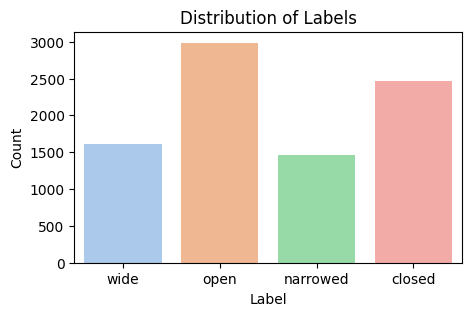

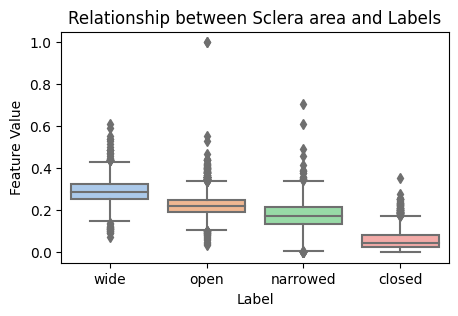

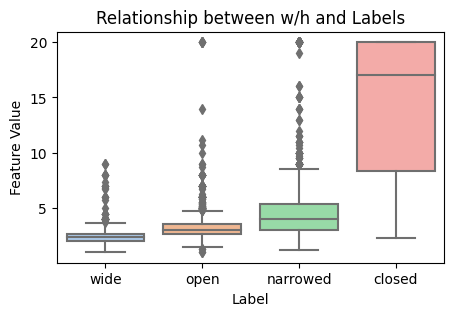

In [37]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, x='label', palette='pastel')
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='normalized_sclera_area', palette='pastel')
plt.title('Relationship between Sclera area and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

plt.figure(figsize=(5, 3))
sns.boxplot(data=df, x='label', y='width_over_height', palette='pastel')
plt.title('Relationship between w/h and Labels')
plt.xlabel('Label')
plt.ylabel('Feature Value')
plt.show()

In [38]:
ordinal_mapping = OrderedDict({
    "wide": 0,
    "open": 1,
    "narrowed": 2,
    "closed": 3
})

In [39]:
X = df[['normalized_sclera_area', 'width_over_height']].values
y = df['label'].map(ordinal_mapping).values

In [40]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [41]:
classifier = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticAT())
])

classifier.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('classifier', LogisticAT())])

In [42]:
y_train_pred = cross_val_predict(classifier, X, y, cv=100)
y_train_pred

array([0, 1, 0, ..., 3, 3, 3])

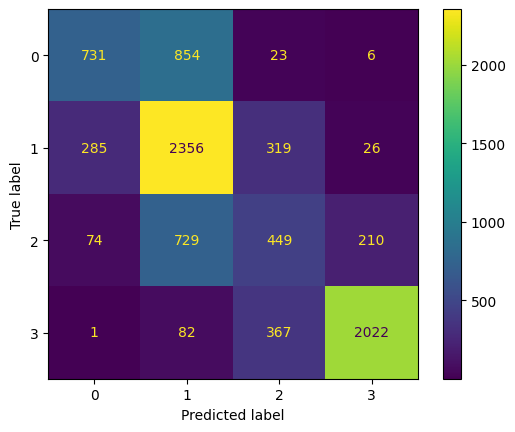

In [43]:
mat = confusion_matrix(y, y_train_pred)
ConfusionMatrixDisplay(mat, display_labels=classifier.classes_).plot()

In [44]:
precision = precision_score(y, y_train_pred, average='weighted')
recall = recall_score(y, y_train_pred, average='weighted')
f1_score = 2 * (precision * recall) / (precision + recall)

print(precision)
print(recall)
print(f1_score)

0.656858697349411
0.6512772439653152
0.6540560634002903


In [45]:
probabilities = classifier.predict_proba(X)
probabilities

array([[7.54438233e-01, 2.29038242e-01, 1.43400080e-02, 2.18351639e-03],
       [3.92384835e-01, 5.33599810e-01, 6.37117989e-02, 1.03035557e-02],
       [6.13247032e-01, 3.55225636e-01, 2.73052232e-02, 4.22210861e-03],
       ...,
       [7.80885086e-05, 1.43255793e-03, 9.97185955e-03, 9.88517494e-01],
       [1.74002716e-03, 3.09253337e-02, 1.73220520e-01, 7.94114119e-01],
       [4.96424498e-04, 9.03391520e-03, 5.92629721e-02, 9.31206688e-01]])

In [46]:
import pickle

pickle.dump(classifier, open('eyecloseness_model.pkl','wb'))